
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('./shopping_trends_updated.csv')
df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1212,1213,32,Male,Shoes,Footwear,74,Pennsylvania,M,Yellow,Summer,2.5,No,Free Shipping,Yes,Yes,18,Credit Card,Weekly
1433,1434,70,Male,Hoodie,Clothing,60,Minnesota,L,Yellow,Winter,3.2,No,Next Day Air,Yes,Yes,45,Debit Card,Weekly
535,536,56,Male,T-shirt,Clothing,45,West Virginia,L,Maroon,Spring,3.2,Yes,Free Shipping,Yes,Yes,24,Bank Transfer,Weekly
324,325,37,Male,Shirt,Clothing,82,Wyoming,M,Olive,Summer,4.8,Yes,Standard,Yes,Yes,37,Venmo,Quarterly
670,671,63,Male,Sweater,Clothing,41,Louisiana,XL,Purple,Spring,4.8,Yes,Next Day Air,Yes,Yes,37,Cash,Bi-Weekly
3540,3541,24,Female,Shorts,Clothing,95,Nevada,M,Magenta,Spring,4.6,No,Free Shipping,No,No,5,Bank Transfer,Weekly
911,912,53,Male,Pants,Clothing,74,Vermont,M,Black,Winter,2.8,Yes,2-Day Shipping,Yes,Yes,2,Bank Transfer,Quarterly
3483,3484,19,Female,Hoodie,Clothing,37,Texas,L,White,Winter,3.9,No,Express,No,No,21,Credit Card,Every 3 Months
2125,2126,57,Male,Coat,Outerwear,87,New Hampshire,M,Beige,Fall,4.8,No,Store Pickup,No,No,31,PayPal,Quarterly
1884,1885,27,Male,Shorts,Clothing,30,Arizona,S,Pink,Summer,4.3,No,Next Day Air,No,No,15,Bank Transfer,Bi-Weekly


In [44]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [46]:
#Женщины чаще покупают одежду осенью
season_gender = df.groupby(['Season', 'Gender'])['Item Purchased'].count().reset_index()
print(season_gender)

# Получилось действительно немного чаще, но выглядит, что нет зависимости от сезона

   Season  Gender  Item Purchased
0    Fall  Female             328
1    Fall    Male             647
2  Spring  Female             316
3  Spring    Male             683
4  Summer  Female             298
5  Summer    Male             657
6  Winter  Female             306
7  Winter    Male             665


<AxesSubplot:title={'center':'Purchase Amount (USD)'}, xlabel='Season'>

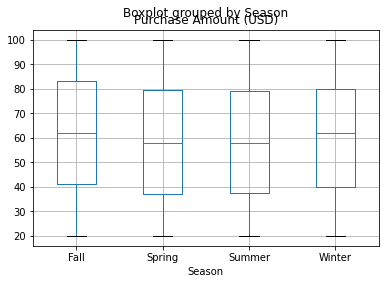

In [49]:
# Более дорогие товары заказываются зимой


df.boxplot(column='Purchase Amount (USD)', by='Season')


#ОСенью и зимой примерно одинаково

In [56]:
# Покупатели с подпиской (`Subscription Status`) чаще выбирают бесплатную доставку (`Shipping Type` = "Free Shipping")


subscription_shipping = df.groupby(['Subscription Status', 'Shipping Type']).size().reset_index(name='Count')


subscription_shipping_pivot = subscription_shipping.pivot(index='Subscription Status', columns='Shipping Type', values='Count').fillna(0)
subscription_shipping_pivot['Free Shipping Ratio'] = subscription_shipping_pivot['Free Shipping'] / subscription_shipping_pivot.sum(axis=1)


print(subscription_shipping_pivot)

# Да, с подпиской немного чаще выбирают бесплатную доставку

Shipping Type        2-Day Shipping  Express  Free Shipping  Next Day Air  \
Subscription Status                                                         
No                              474      456            498           480   
Yes                             153      190            177           168   

Shipping Type        Standard  Store Pickup  Free Shipping Ratio  
Subscription Status                                               
No                        479           460             0.174921  
Yes                       175           190             0.168091  


  Promo Code Used  Purchase Amount (USD)
0              No              60.130454
1             Yes              59.279070


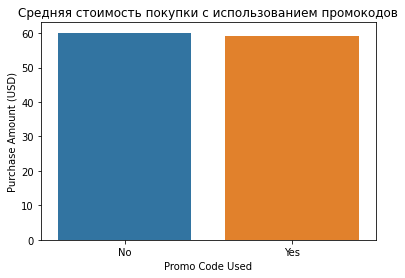

In [57]:
#Более дорогие товары чаще покупаются при использовании промокодов (`Promo Code Used` = "Yes").

promo_purchase = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().reset_index()

print(promo_purchase)

import seaborn as sns
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_purchase)
plt.title('Средняя стоимость покупки с использованием промокодов')
plt.show()


#Зависимость отсутствует

   Gender  Season  Item Purchased
0  Female    Fall              41
1  Female  Spring              66
2  Female  Summer              47
3  Female  Winter              45
4    Male    Fall              95
5    Male  Spring              97
6    Male  Summer             113
7    Male  Winter              95


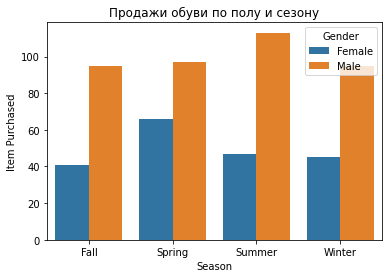

In [58]:
#Женщины чаще покупают обувь (`Category` = "Footwear") летом (`Season` = "Summer").

footwear_data = df[df['Category'] == 'Footwear']

gender_season_footwear = footwear_data.groupby(['Gender', 'Season'])['Item Purchased'].count().reset_index()

print(gender_season_footwear)

sns.barplot(x='Season', y='Item Purchased', hue='Gender', data=gender_season_footwear)
plt.title('Продажи обуви по полу и сезону')
plt.show()

#Чаще обувь женщины покупают весной

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('./shopping_trends_updated.csv')
df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3762,3763,65,Female,Shorts,Clothing,94,New York,L,Green,Fall,2.9,No,Store Pickup,No,No,13,PayPal,Annually
2900,2901,41,Female,Blouse,Clothing,67,Maryland,XL,Violet,Winter,4.0,No,Standard,No,No,23,Cash,Bi-Weekly
13,14,65,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
1663,1664,43,Male,Shirt,Clothing,22,Maine,XL,Gold,Summer,3.5,No,Standard,Yes,Yes,1,Cash,Bi-Weekly
269,270,68,Male,Blouse,Clothing,44,Georgia,M,Charcoal,Winter,3.3,Yes,Next Day Air,Yes,Yes,9,Cash,Bi-Weekly
206,207,24,Male,T-shirt,Clothing,55,Wisconsin,L,Silver,Summer,4.2,Yes,Free Shipping,Yes,Yes,6,Venmo,Fortnightly
2630,2631,29,Male,Skirt,Clothing,82,Maine,S,Pink,Spring,4.2,No,Free Shipping,No,No,20,Cash,Quarterly
617,618,50,Male,Backpack,Accessories,57,Colorado,M,Maroon,Fall,2.6,Yes,Standard,Yes,Yes,2,Bank Transfer,Quarterly
1513,1514,22,Male,Socks,Clothing,35,Texas,M,Red,Spring,4.1,No,Free Shipping,Yes,Yes,27,Cash,Monthly
655,656,20,Male,Handbag,Accessories,36,Mississippi,S,Purple,Fall,3.1,Yes,Free Shipping,Yes,Yes,19,Venmo,Monthly


In [31]:
# самый популярный товар
popular_item = df['Item Purchased'].value_counts().idxmax()
popular_count = df['Item Purchased'].value_counts().max()

print(f"Самый популярный товар: {popular_item} (Количество покупок: {popular_count})")

Самый популярный товар: Blouse (Количество покупок: 171)


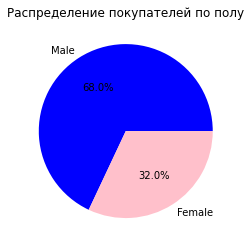

In [33]:
# Распределение по полу
gender_distribution = df['Gender'].value_counts()

import matplotlib.pyplot as plt

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Распределение покупателей по полу')
plt.ylabel('')
plt.show()

In [37]:
# Пол, который покупает больше всего
most_purchases_by_gender = df['Gender'].value_counts().idxmax()

# Возрастная группа, которая покупает больше всего
most_purchases_by_age = df.groupby('Age').size().idxmax()

most_expensive_group = df.loc[df['Purchase Amount (USD)'].idxmax(), ['Gender', 'Age']]

print(f"Больше всего покупают: {most_purchases_by_gender} (Возраст: {most_purchases_by_age})")
print(f"Самые дорогие товары покупает: {most_expensive_group}")

Больше всего покупают: Male (Возраст: 69)
Самые дорогие товары покупает: Gender    Male
Age         20
Name: 42, dtype: object


In [38]:
# Связь между цветом и сезоном
color_season_relation = df.groupby(['Color', 'Season']).size().unstack()

print(color_season_relation)

Season     Fall  Spring  Summer  Winter
Color                                  
Beige        34      39      37      37
Black        42      43      42      40
Blue         32      39      46      35
Brown        35      33      33      40
Charcoal     32      42      36      43
Cyan         43      42      42      39
Gold         36      38      30      34
Gray         44      48      40      27
Green        37      38      44      50
Indigo       37      37      32      41
Lavender     38      32      39      38
Magenta      50      37      35      30
Maroon       40      39      35      44
Olive        47      52      35      43
Orange       45      39      37      33
Peach        42      38      24      45
Pink         35      44      29      45
Purple       37      43      38      33
Red          42      31      36      39
Silver       39      37      59      38
Teal         40      46      49      37
Turquoise    27      41      36      41
Violet       44      45      40      37


In [39]:
# Сезон с максимальным количеством покупателей
most_popular_season = df['Season'].value_counts().idxmax()

print(f"Самый популярный сезон: {most_popular_season}")

Самый популярный сезон: Spring


In [41]:
from collections import Counter

all_letters = ''.join(df['Item Purchased']).replace(' ', '')

letter_counts = Counter(all_letters)
most_common_letter = letter_counts.most_common(1)[0]

print(f"Самая популярная буква: {most_common_letter[0]} (Встречается {most_common_letter[1]} раз)")

Самая популярная буква: s (Встречается 2483 раз)


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./drinks.csv")

In [5]:
df_sorted_by_wine = df.sort_values(by='wine_servings', ascending=False)
df_sorted_by_wine.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [6]:
df_sorted_by_beer = df.sort_values(by='beer_servings', ascending=False)
df_sorted_by_beer.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [7]:
df_sorted_by_spirit = df.sort_values(by='spirit_servings', ascending=False)
df_sorted_by_spirit.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
68,Grenada,199,438,28,11.9
15,Belarus,142,373,42,14.4
73,Haiti,1,326,1,5.9
141,Russian Federation,247,326,73,11.5
144,St. Lucia,171,315,71,10.1
72,Guyana,93,302,1,7.1
155,Slovakia,196,293,116,11.4
50,Dominica,52,286,26,6.6
169,Thailand,99,258,1,6.4
40,Cook Islands,0,254,74,5.9


In [8]:
df['most_consumed'] = df[['beer_servings', 'spirit_servings', 'wine_servings']].idxmax(axis=1)
df[['country', 'most_consumed']].head(10)

,country,most_consumed
0,Afghanistan,beer_servings
1,Albania,spirit_servings
2,Algeria,beer_servings
3,Andorra,wine_servings
4,Angola,beer_servings
5,Antigua & Barbuda,spirit_servings
6,Argentina,wine_servings
7,Armenia,spirit_servings
8,Australia,beer_servings
9,Austria,beer_servings


In [9]:
# Среднее потребление каждого вида алкоголя
average_consumption = df[['beer_servings', 'spirit_servings', 'wine_servings']].mean()
print(average_consumption)

beer_servings      106.160622
spirit_servings     80.994819
wine_servings       49.450777
dtype: float64


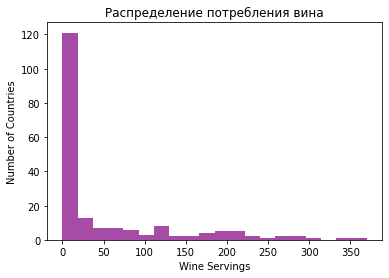

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['wine_servings'], bins=20, color='purple', alpha=0.7)
plt.title('Распределение потребления вина')
plt.xlabel('Wine Servings')
plt.ylabel('Number of Countries')
plt.show()

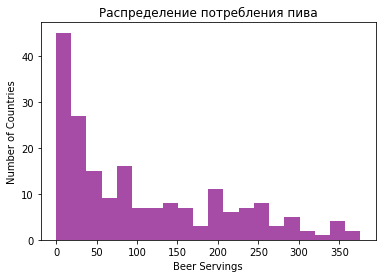

In [11]:
plt.hist(df['beer_servings'], bins=20, color='purple', alpha=0.7)
plt.title('Распределение потребления пива')
plt.xlabel('Beer Servings')
plt.ylabel('Number of Countries')
plt.show()

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [12]:
import pandas as pd

In [19]:
df = pd.read_csv('./tarantino.csv')
df.sample(10)

,movie,type,word,minutes_in
28,Reservoir Dogs,word,jap,2.93
442,Pulp Fiction,word,fucking,2.45
1099,Kill Bill: Vol. 2,word,shit,112.52
1582,Jackie Brown,word,n-word,17.12
1014,Kill Bill: Vol. 1,death,NaN,85.98
1504,Django Unchained,word,damn,158.92
379,Reservoir Dogs,word,fuck,84.30
1868,Jackie Brown,word,goddamn,134.02
501,Pulp Fiction,word,goddamn,19.58
1264,Django Unchained,word,n-word,43.65


In [22]:
df['type'].unique()

array(['word', 'death'], dtype=object)

In [24]:
# количество ругательств и смертей и их соотношение по фильмам
death_counts = df[df['type'] == 'death'].groupby('movie').size()
curse_counts = df[df['type'] == 'word'].groupby('movie').size()

curse_to_death_ratio = curse_counts / death_counts

summary = pd.DataFrame({
    'curse_count': curse_counts,
    'death_count': death_counts,
    'curse_to_death_ratio': curse_to_death_ratio
}).fillna(0)
print(summary)

                     curse_count  death_count  curse_to_death_ratio
movie                                                              
Django Unchained             262           47              5.574468
Inglorious Basterds           58           48              1.208333
Jackie Brown                 368            4             92.000000
Kill Bill: Vol. 1             57           63              0.904762
Kill Bill: Vol. 2             69           11              6.272727
Pulp Fiction                 469            7             67.000000
Reservoir Dogs               421           10             42.100000


In [23]:
# Частота каждого ругательства
word_frequency = df['word'].value_counts()
print(word_frequency)

fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards     

In [25]:
df_sorted = df.sort_values(by=['movie', 'minutes_in'])

df_sorted['time_diff'] = df_sorted.groupby('movie')['minutes_in'].diff()

# Распределение времени между ругательствами
print(df_sorted[['movie', 'word', 'time_diff']])

                 movie     word  time_diff
1213  Django Unchained  goddamn        NaN
1214  Django Unchained      NaN       0.52
1215  Django Unchained  goddamn       0.62
1216  Django Unchained    bitch       0.01
1217  Django Unchained     damn       0.27
...                ...      ...        ...
426     Reservoir Dogs  fucking       0.31
427     Reservoir Dogs  fucking       0.12
428     Reservoir Dogs  fucking       0.00
429     Reservoir Dogs      NaN       0.07
430     Reservoir Dogs      NaN       0.00

[1894 rows x 3 columns]


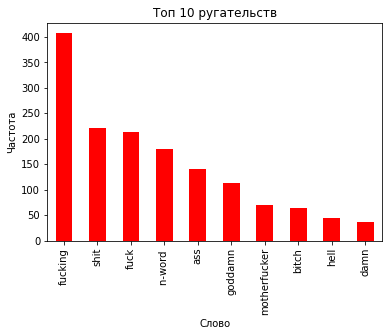

In [26]:
import matplotlib.pyplot as plt

# график частоты использования ругательств
word_frequency.head(10).plot(kind='bar', color='red')
plt.title('Топ 10 ругательств')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.show()

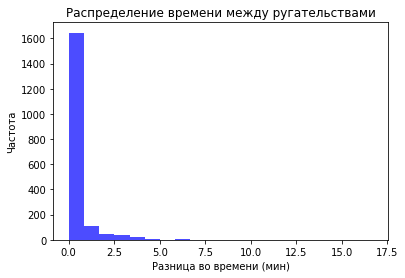

In [59]:
# Гистограмма времени между ругательствами
df_sorted['time_diff'].dropna().plot(kind='hist', bins=20, color='blue', alpha=0.7)
plt.title('Распределение времени между ругательствами')
plt.xlabel('Разница во времени (мин)')
plt.ylabel('Частота')
plt.show()